# DATA 620 - Assignment (Week 8)


## Description of Corpus

#### Choose a corpus of interest.

The 'Heart of Darkness' by Joseph Conrad has been selected as the corpus for the following exercise in elementary Natural Language Processing tasks.

We start by importing packages used for the assignment.

In [389]:
import nltk
import re
import urllib
import pandas
import numpy
from scipy import stats
import seaborn
import matplotlib.pyplot as plt

%matplotlib inline
#nltk.download()

We fetch the 'Heart of Darkness' text from Project Gutenberg:

In [390]:
url = "http://www.gutenberg.org/files/219/219-0.txt"
response = urllib.urlopen(url)
raw = response.read().decode('utf8')

We extract the main content of the text (i.e., excluding header and footer information)

In [391]:
# define phrase to mark start
startTextString="HEART OF DARKNESS"
# define phrase to mark end
endTextString="End of the Project Gutenberg EBook of Heart of Darkness, by Joseph Conrad"
# find start of text
textStart = raw.find(startTextString)
# find end of text
textEnd = raw.find(endTextString)
# extract content between start and end
rawText = raw[textStart:textEnd]

We can see that the title of the text is located in the first 17 characters of the extracted main text:

In [392]:
str(rawText[0:17])

'HEART OF DARKNESS'

## Corpus Exploration

#### How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

We extract only words with letters, excluding numbers and punctuation:

In [393]:
# tokenize raw text
tokens = nltk.word_tokenize(rawText)
# extract only alphabetic
words = [w for w in tokens if w.isalpha()]
# convert to lowercase
words = [w.lower() for w in words]
# fetch stopword list
#stopwordList = nltk.corpus.stopwords.words('english') 
# remove stop words
#words = [w for w in words if w not in stopwordList]
# count number of words
nWords=len(set(words))

In [394]:
nWords

5296

This crude definition of 'words' gives us 5296 unique words.

We can likely significantly reduce our unique word count by applying some basic stemming:

In [395]:
# define stemmer
ps = nltk.stem.porter.PorterStemmer()
# apply stemming
wordsStemmed = [ps.stem(w) for w in words]
# determine set
wordsStemmedSet = set(wordsStemmed)
# compute number of words after stemming
nWordsStemmed=len(wordsStemmedSet)
# display number of words after stemming
nWordsStemmed

3916

Lemmatization would also reduce the number of unique words:

In [396]:
# initialize
wordnet = nltk.stem.WordNetLemmatizer()
# apply lemmatization
wordsLemmatized = [wordnet.lemmatize(w) for w in words]
# determine set
wordsLemmatizedSet = set(wordsLemmatized)
# compute number of words lemmatized
nWordsLemmatized=len(wordsLemmatizedSet)
# display number of words lemmatized
nWordsLemmatized

4888

#### Taking the most common words, how many unique words represent half of the total words in the corpus?

We determine the word frequency (before any stemming or lemmatization):

In [397]:
# determine word frequency (before stemming or lemmatization)
fdWords = nltk.FreqDist(words)

We convert frequency counts to percent of total and create a cumulative frequency percent:

In [398]:
# create dataframe word by count
wordsDf = pandas.DataFrame.from_dict(fdWords, orient='index')
# rename the column
wordsDf.rename(columns={0 : 'frequencyCount'},inplace=True)
# add frequency percent
wordsDf['frequencyPercent']=wordsDf['frequencyCount']/wordsDf['frequencyCount'].sum()
# sort by frequency count
wordsDf=wordsDf.sort_values(ascending=False,by=['frequencyCount'])
# compute cumulative frequency counts and percents
wordsCumulativeFrequencyDf=wordsDf.cumsum(axis=0)
# rename columns to reflect 'cumulative' count and frequency
wordsCumulativeFrequencyDf.rename(columns={'frequencyCount' : 'cumulativeFrequencyCount',
    'frequencyPercent' : 'cumulativeFrequencyPercent'},inplace=True)
# add cumulative frequency counts and percents to create table
wordTable=pandas.merge(wordsDf,wordsCumulativeFrequencyDf,right_index=True,left_index=True)

In [399]:
# display word by frequency count (sorted)
wordTable

,frequencyCount,frequencyPercent,cumulativeFrequencyCount,cumulativeFrequencyPercent
the,2292,0.059753,2292.0,0.059753
of,1371,0.035742,3663.0,0.095495
i,1153,0.030059,4816.0,0.125554
a,1148,0.029929,5964.0,0.155483
and,993,0.025888,6957.0,0.181370
to,893,0.023281,7850.0,0.204651
was,671,0.017493,8521.0,0.222144
in,613,0.015981,9134.0,0.238125
he,592,0.015434,9726.0,0.253559
had,503,0.013113,10229.0,0.266672


Next we create an index to find the cumulative percent frequency greater than or equal to 50%:

In [400]:
halfIndex=wordTable['cumulativeFrequencyPercent']<0.501

In [401]:
wordTable.loc[halfIndex]

,frequencyCount,frequencyPercent,cumulativeFrequencyCount,cumulativeFrequencyPercent
the,2292,0.059753,2292.0,0.059753
of,1371,0.035742,3663.0,0.095495
i,1153,0.030059,4816.0,0.125554
a,1148,0.029929,5964.0,0.155483
and,993,0.025888,6957.0,0.181370
to,893,0.023281,7850.0,0.204651
was,671,0.017493,8521.0,0.222144
in,613,0.015981,9134.0,0.238125
he,592,0.015434,9726.0,0.253559
had,503,0.013113,10229.0,0.266672


61 unique words represent half of the total words in the 'Heart of Darkness'.

#### Identify the 200 highest frequency words in this corpus

Using the frequency table constructed above we select the 200 most common words as follows:

In [402]:
# define top N most common words
topWordsN=200
# find N most common words
fdTopWords = wordTable.head(topWordsN)

In [403]:
fdTopWords

,frequencyCount,frequencyPercent,cumulativeFrequencyCount,cumulativeFrequencyPercent
the,2292,0.059753,2292.0,0.059753
of,1371,0.035742,3663.0,0.095495
i,1153,0.030059,4816.0,0.125554
a,1148,0.029929,5964.0,0.155483
and,993,0.025888,6957.0,0.181370
to,893,0.023281,7850.0,0.204651
was,671,0.017493,8521.0,0.222144
in,613,0.015981,9134.0,0.238125
he,592,0.015434,9726.0,0.253559
had,503,0.013113,10229.0,0.266672


## Visualization

#### Create a graph that shows the relative frequency of these 200 words.

We create a graph that illustrates the *relative frequency* of the top 200 words as follows:

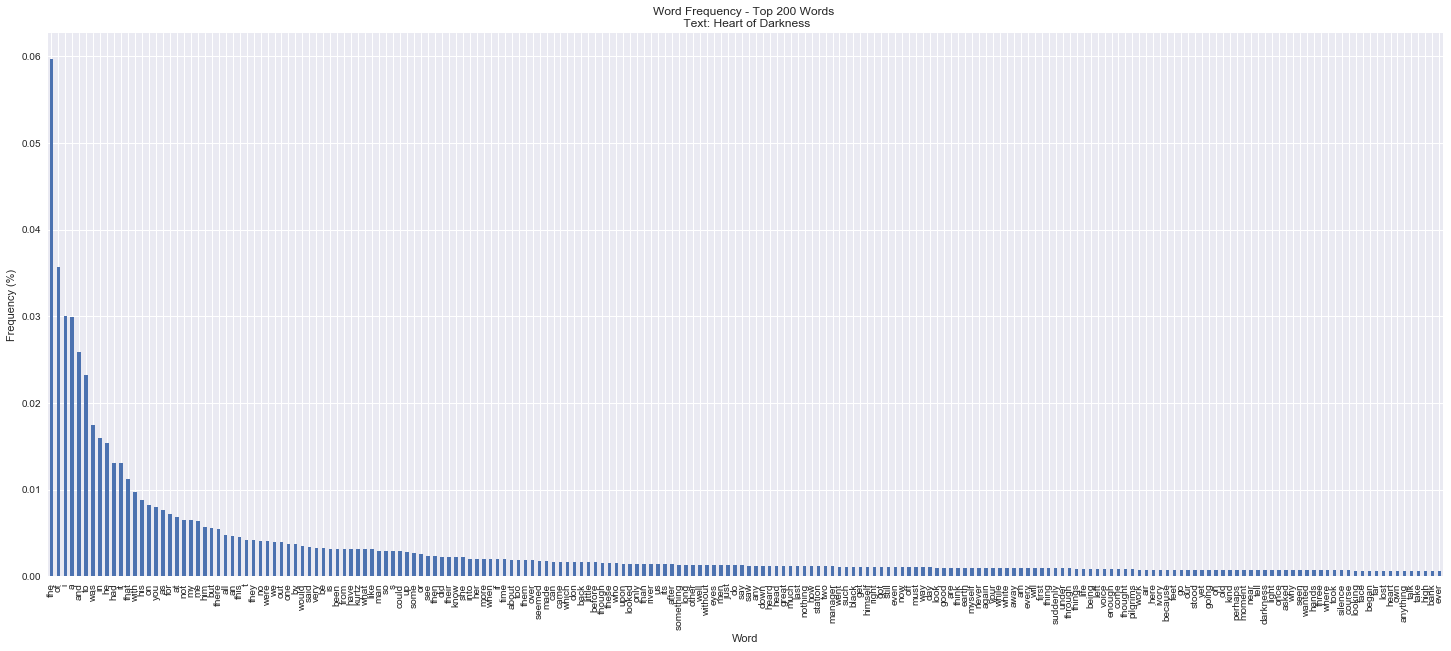

In [404]:
# size plot
plt.figure(figsize=(25,10))
# add title
plt.title("Word Frequency - Top 200 Words \n Text: Heart of Darkness")
# plot
fdTopWords['frequencyPercent'].plot('bar')
plt.ylabel("Frequency (%)")
plt.xlabel("Word")

We create a graph that shows the *cumulative relative frequency* of the top 200 words as follows:

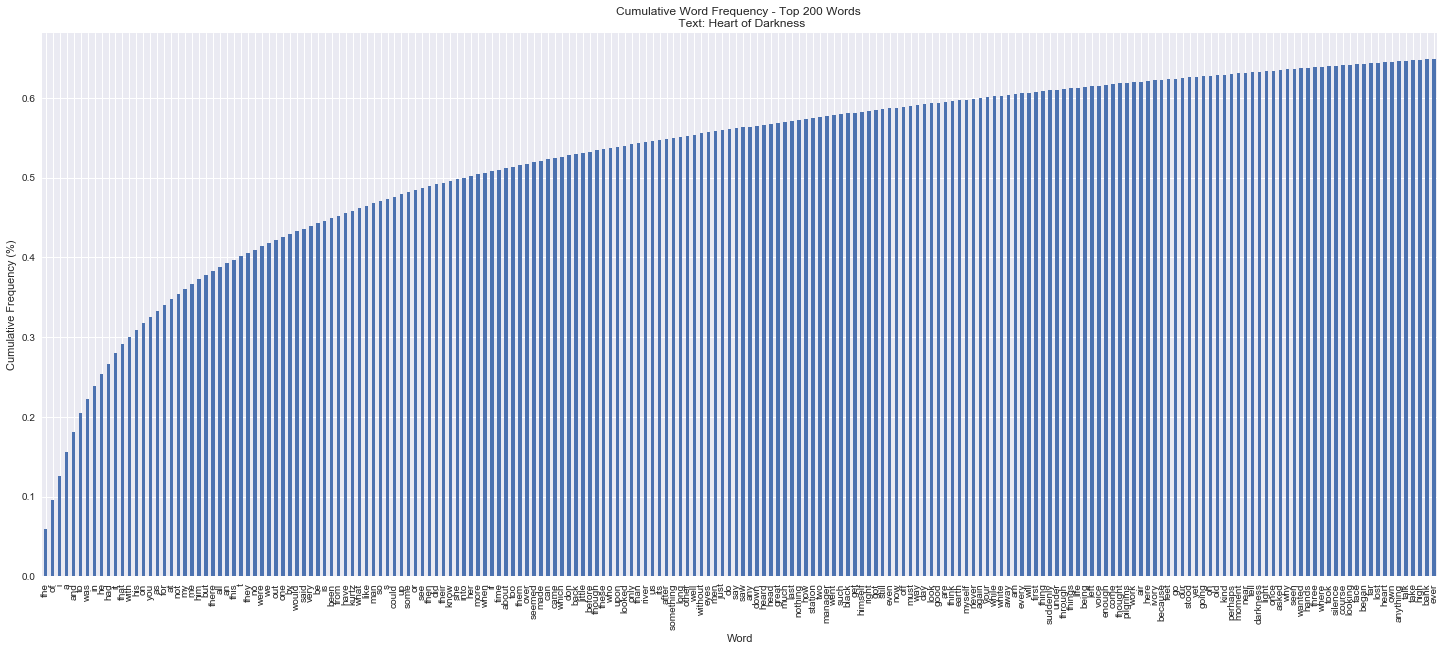

In [405]:
# size plot
plt.figure(figsize=(25,10))
# add title
plt.title("Cumulative Word Frequency - Top 200 Words \n Text: Heart of Darkness")
# plot
fdTopWords['cumulativeFrequencyPercent'].plot('bar')
plt.ylabel("Cumulative Frequency (%)")
plt.xlabel("Word")

#### Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table.

$$f(k;s,N)=\frac{1/k^{s}}{\sum_{n=1}^{N}(1/n^{s})}$$

Where $N$ is the number of elements, $k$ is their rank, and $s$ is the value of the exponent characterizing the distribution.

Zipf's law holds if the number of elements with a given frequency is a random variable with power law distribution:

$$p(f)=\alpha f^{-1-1/s}$$ 

Equivalently 

$$\log(f) = \log(\alpha) – s \log(k)$$

where $f$ is the frequency of a word, $k$ is the word’s rank, and $\alpha$ and $s$ are parameters that depend on the language.

Using a log-log plot - where the x-axis is log(rank order) and the y-axis is log(frequency) - it is easy to visualize the applicability of Zipf's law for a particular text data set.

We estimate the parameters of Zipf's law for our data set as follows:

In [406]:
# set word rank (x)
wordRank = numpy.log(range(1, len(fdTopWords)+1))
# set word count (y)
wordCount = numpy.log(fdTopWords['frequencyCount'])
# estimate best fit line
slope, intercept, r_value, p_value, std_err = stats.linregress(wordRank,wordCount)
# create fitted work count based on estimates of s and alpha
fittedWordCount = slope * x + intercept
print 'Estimate of s is:\n{0}'.format(slope,3)

Estimate of s is:
-0.978581161179


In [407]:
print 'Estimate of alpha is:\n{0}'.format(intercept,3)

Estimate of alpha is:
8.39757422259


In [408]:
print 'R^2 of our fitted line is:\n{0}'.format(r_value**2,3)

R^2 of our fitted line is:
0.992498569026


We create the log-log plot (word rank by count) of the most common words - along with the fitted line representing Zipf's law - as follows:

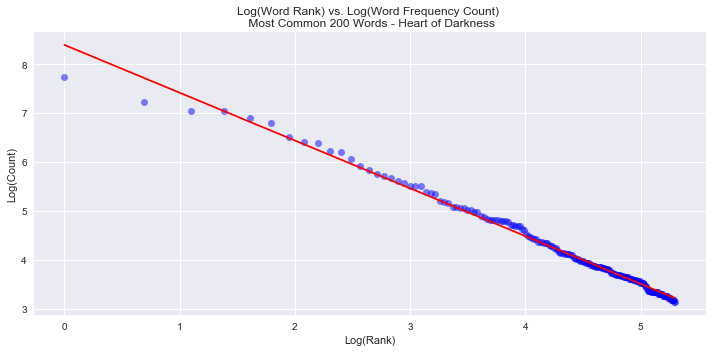

In [409]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
# plot
ax.plot(wordRank, wordCount, 'bo', alpha = 0.5)
# plot fitted line
ax.plot(x,fittedWordCount,'r')
# add title
ax.set_title('Log(Word Rank) vs. Log(Word Frequency Count) \n Most Common 200 Words - Heart of Darkness')
# add x-axis label
ax.set_xlabel('Log(Rank)')
# add y-axis label
ax.set_ylabel('Log(Count)')
# set 'tight' layout
plt.tight_layout()

With a slope close to negative one and an R-squared of 99.3%, our 200 most frequently occurring words appear to follow Zipf's Law relatively closely.

## Conclusion
#### In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In the Brown Corpus of American English text, the word "the" is the most frequently occurring word, accounting for almost 7% of all word occurrences. The second most common word, "of", accounts for slightly over 3.5% of words, while the third most frequent word, "and", accounts for roughly 2.8%. 

The top word frequency rankings of our chosen text, 'Heart of Darkness', are similar with the word "the" ranking first (5.9753%), the word "of" ranking second (3.5742%), but the word "and" ranking fifth (2.5888%), behind the word "i" (3.0059%) and the word "a" (2.9929%).

While 135 vocabulary items are needed to account for half of the Brown Corpus, for 'Heart of Darkness', only 61 vocabulary items account for 50.0104%.

Despite doing only the most superficial natural language processing, we can guess that our book tells the story using a first-person narration (i.e., inferred from the frequent use of "i"). When compared to "all words in all corpora", I would also expect that we would find the words 'darkness' and 'light' occur more frequently in this book.

## Appendix

In this appendix we explore the impact of stemming and lemmatization on our results.

In [410]:
# determine word frequency (after stemming)
fdWordsStemmed = nltk.FreqDist(wordsStemmed)

In [411]:
# create dataframe word by count
wordsStemmedDf = pandas.DataFrame.from_dict(fdWordsStemmed, orient='index')
# rename the column
wordsStemmedDf.rename(columns={0 : 'frequencyCount'},inplace=True)
# add frequency percent
wordsStemmedDf['frequencyPercent']=wordsStemmedDf['frequencyCount']/wordsStemmedDf['frequencyCount'].sum()
# sort by frequency count
wordsStemmedDf=wordsStemmedDf.sort_values(ascending=False,by=['frequencyCount'])
# compute cumulative frequency counts and percents
wordsStemmedCumulativeFrequencyDf=wordsStemmedDf.cumsum(axis=0)
# rename columns to reflect 'cumulative' count and frequency
wordsStemmedCumulativeFrequencyDf.rename(columns={'frequencyCount' : 'cumulativeFrequencyCount',
    'frequencyPercent' : 'cumulativeFrequencyPercent'},inplace=True)
# add cumulative frequency counts and percents to create table
wordStemmedTable=pandas.merge(wordsStemmedDf,wordsStemmedCumulativeFrequencyDf,right_index=True,left_index=True)

In [412]:
wordStemmedTable

,frequencyCount,frequencyPercent,cumulativeFrequencyCount,cumulativeFrequencyPercent
the,2292,0.059753,2292.0,0.059753
of,1373,0.035794,3665.0,0.095547
i,1153,0.030059,4818.0,0.125606
a,1148,0.029929,5966.0,0.155535
and,993,0.025888,6959.0,0.181422
to,893,0.023281,7852.0,0.204703
wa,671,0.017493,8523.0,0.222196
in,613,0.015981,9136.0,0.238177
he,592,0.015434,9728.0,0.253611
it,553,0.014417,10281.0,0.268028


In [413]:
halfIndexStemmed=wordStemmedTable['cumulativeFrequencyPercent']<0.501

In [414]:
wordStemmedTable.loc[halfIndexStemmed]

,frequencyCount,frequencyPercent,cumulativeFrequencyCount,cumulativeFrequencyPercent
the,2292,0.059753,2292.0,0.059753
of,1373,0.035794,3665.0,0.095547
i,1153,0.030059,4818.0,0.125606
a,1148,0.029929,5966.0,0.155535
and,993,0.025888,6959.0,0.181422
to,893,0.023281,7852.0,0.204703
wa,671,0.017493,8523.0,0.222196
in,613,0.015981,9136.0,0.238177
he,592,0.015434,9728.0,0.253611
it,553,0.014417,10281.0,0.268028


In [415]:
# find N most common words
fdTopWordsStemmed = wordStemmedTable.head(topWordsN)

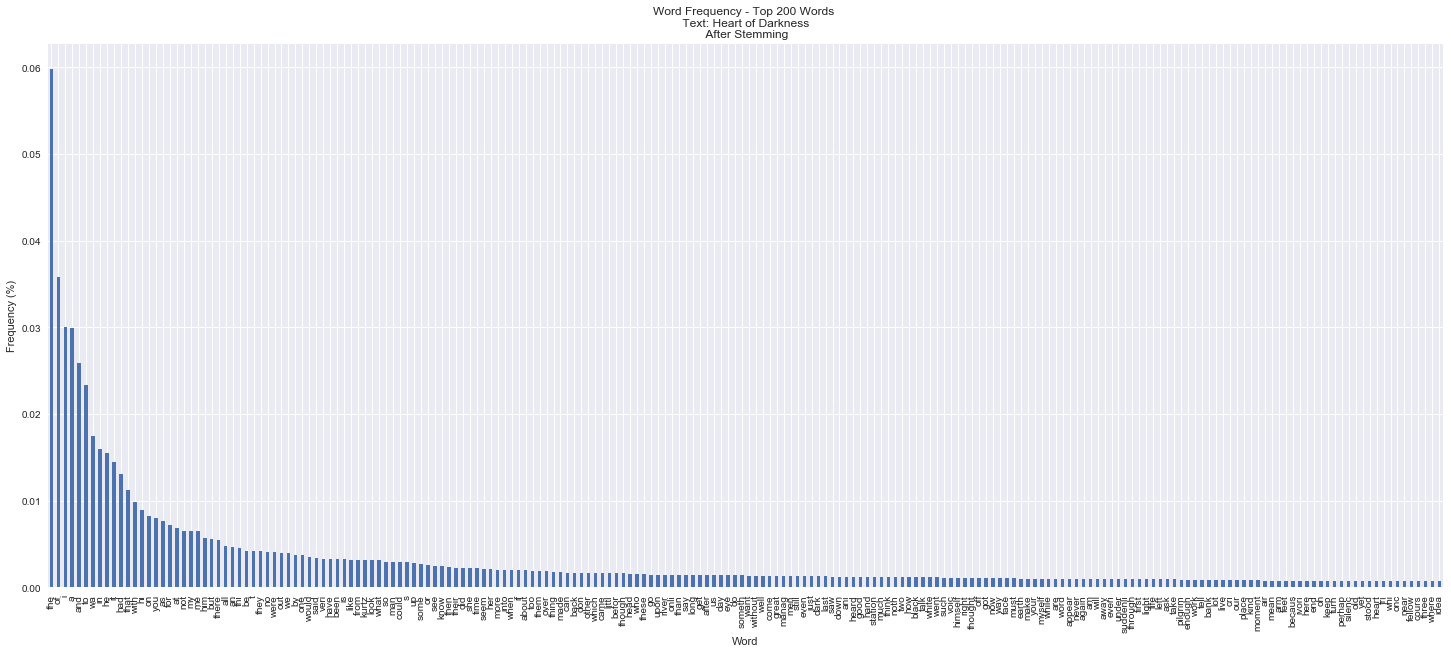

In [416]:
# size plot
plt.figure(figsize=(25,10))
# add title
plt.title("Word Frequency - Top 200 Words \n Text: Heart of Darkness \n After Stemming")
# plot
fdTopWordsStemmed['frequencyPercent'].plot('bar')
plt.ylabel("Frequency (%)")
plt.xlabel("Word")

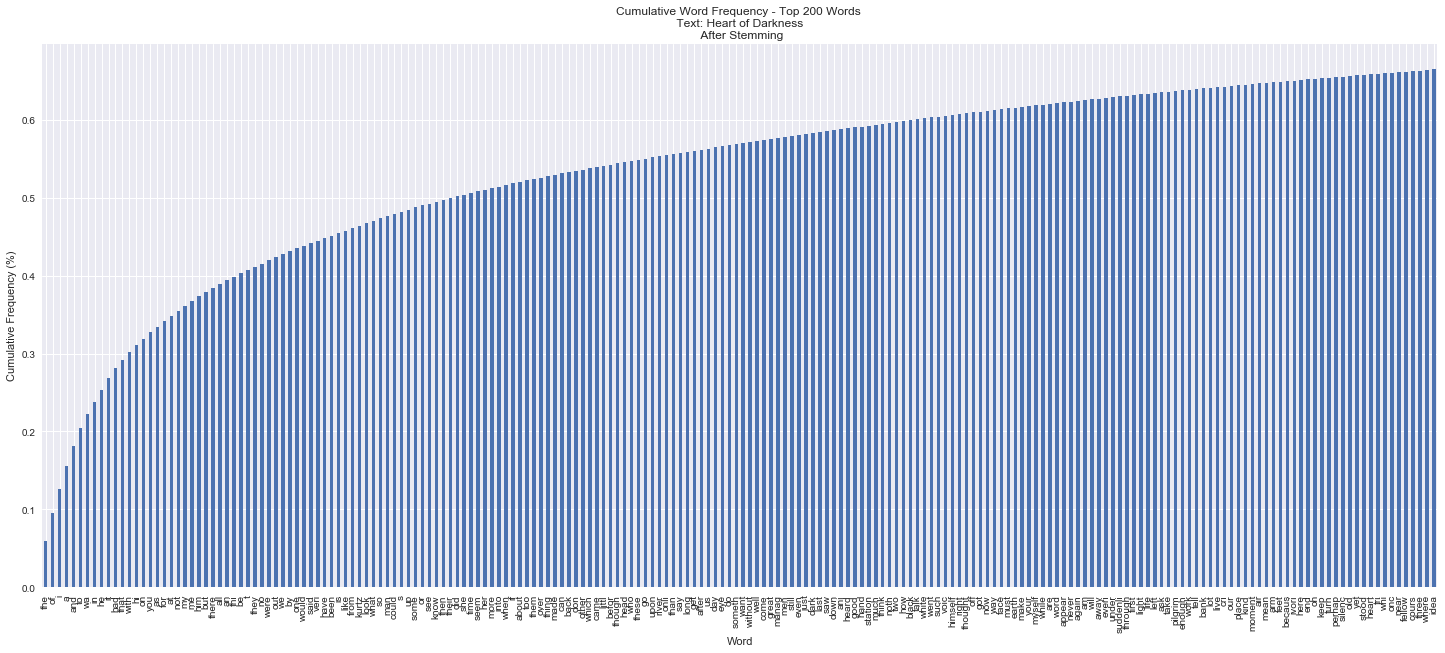

In [417]:
# size plot
plt.figure(figsize=(25,10))
# add title
plt.title("Cumulative Word Frequency - Top 200 Words \n Text: Heart of Darkness \n After Stemming")
# plot
fdTopWordsStemmed['cumulativeFrequencyPercent'].plot('bar')
plt.ylabel("Cumulative Frequency (%)")
plt.xlabel("Word")

In [418]:
# set word rank (x)
wordRankStemmed = numpy.log(range(1, len(fdTopWordsStemmed)+1))
# set word count (y)
wordCountStemmed = numpy.log(fdTopWordsStemmed['frequencyCount'])
# estimate best fit line
slopeStemmed, interceptStemmed, r_valueStemmed, p_valueStemmed, std_errStemmed = stats.linregress(wordRankStemmed,wordCountStemmed)
# create fitted work count based on estimates of s and alpha
fittedWordCountStemmed = slopeStemmed * x + interceptStemmed
print 'Estimate of s is:\n{0}'.format(slopeStemmed,3)

Estimate of s is:
-0.945675037275


In [419]:
print 'Estimate of alpha is:\n{0}'.format(interceptStemmed,3)

Estimate of alpha is:
8.31663692161


In [420]:
print 'R^2 of our fitted line is:\n{0}'.format(r_valueStemmed**2,3)

R^2 of our fitted line is:
0.993380834524


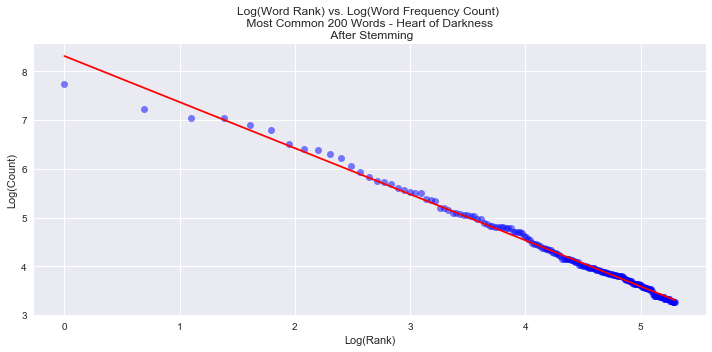

In [421]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
# plot
ax.plot(wordRankStemmed, wordCountStemmed, 'bo', alpha = 0.5)
# plot fitted line
ax.plot(x,fittedWordCountStemmed,'r')
# add title
ax.set_title('Log(Word Rank) vs. Log(Word Frequency Count) \n Most Common 200 Words - Heart of Darkness \n After Stemming')
# add x-axis label
ax.set_xlabel('Log(Rank)')
# add y-axis label
ax.set_ylabel('Log(Count)')
# set 'tight' layout
plt.tight_layout()

In [422]:
# determine word frequency (after lemmatization)
fdWordsLemmatized = nltk.FreqDist(wordsLemmatized)

In [423]:
# create dataframe word by count
wordsLemmatizedDf = pandas.DataFrame.from_dict(fdWordsLemmatized, orient='index')
# rename the column
wordsLemmatizedDf.rename(columns={0 : 'frequencyCount'},inplace=True)
# add frequency percent
wordsLemmatizedDf['frequencyPercent']=wordsLemmatizedDf['frequencyCount']/wordsLemmatizedDf['frequencyCount'].sum()
# sort by frequency count
wordsLemmatizedDf=wordsLemmatizedDf.sort_values(ascending=False,by=['frequencyCount'])
# compute cumulative frequency counts and percents
wordsLemmatizedCumulativeFrequencyDf=wordsLemmatizedDf.cumsum(axis=0)
# rename columns to reflect 'cumulative' count and frequency
wordsLemmatizedCumulativeFrequencyDf.rename(columns={'frequencyCount' : 'cumulativeFrequencyCount',
    'frequencyPercent' : 'cumulativeFrequencyPercent'},inplace=True)
# add cumulative frequency counts and percents to create table
wordLemmatizedTable=pandas.merge(wordsLemmatizedDf,wordsLemmatizedCumulativeFrequencyDf,right_index=True,left_index=True)

In [424]:
wordLemmatizedTable

,frequencyCount,frequencyPercent,cumulativeFrequencyCount,cumulativeFrequencyPercent
the,2292,0.059753,2292.0,0.059753
a,1441,0.037567,3733.0,0.097320
of,1371,0.035742,5104.0,0.133062
i,1153,0.030059,6257.0,0.163121
and,993,0.025888,7250.0,0.189009
to,893,0.023281,8143.0,0.212289
wa,671,0.017493,8814.0,0.229783
in,613,0.015981,9427.0,0.245764
he,592,0.015434,10019.0,0.261197
it,553,0.014417,10572.0,0.275614


In [425]:
halfIndexLemmatized=wordLemmatizedTable['cumulativeFrequencyPercent']<0.501

In [426]:
wordLemmatizedTable.loc[halfIndexLemmatized]

,frequencyCount,frequencyPercent,cumulativeFrequencyCount,cumulativeFrequencyPercent
the,2292,0.059753,2292.0,0.059753
a,1441,0.037567,3733.0,0.097320
of,1371,0.035742,5104.0,0.133062
i,1153,0.030059,6257.0,0.163121
and,993,0.025888,7250.0,0.189009
to,893,0.023281,8143.0,0.212289
wa,671,0.017493,8814.0,0.229783
in,613,0.015981,9427.0,0.245764
he,592,0.015434,10019.0,0.261197
it,553,0.014417,10572.0,0.275614


In [427]:
# find N most common words
fdTopWordsLemmatized = wordLemmatizedTable.head(topWordsN)

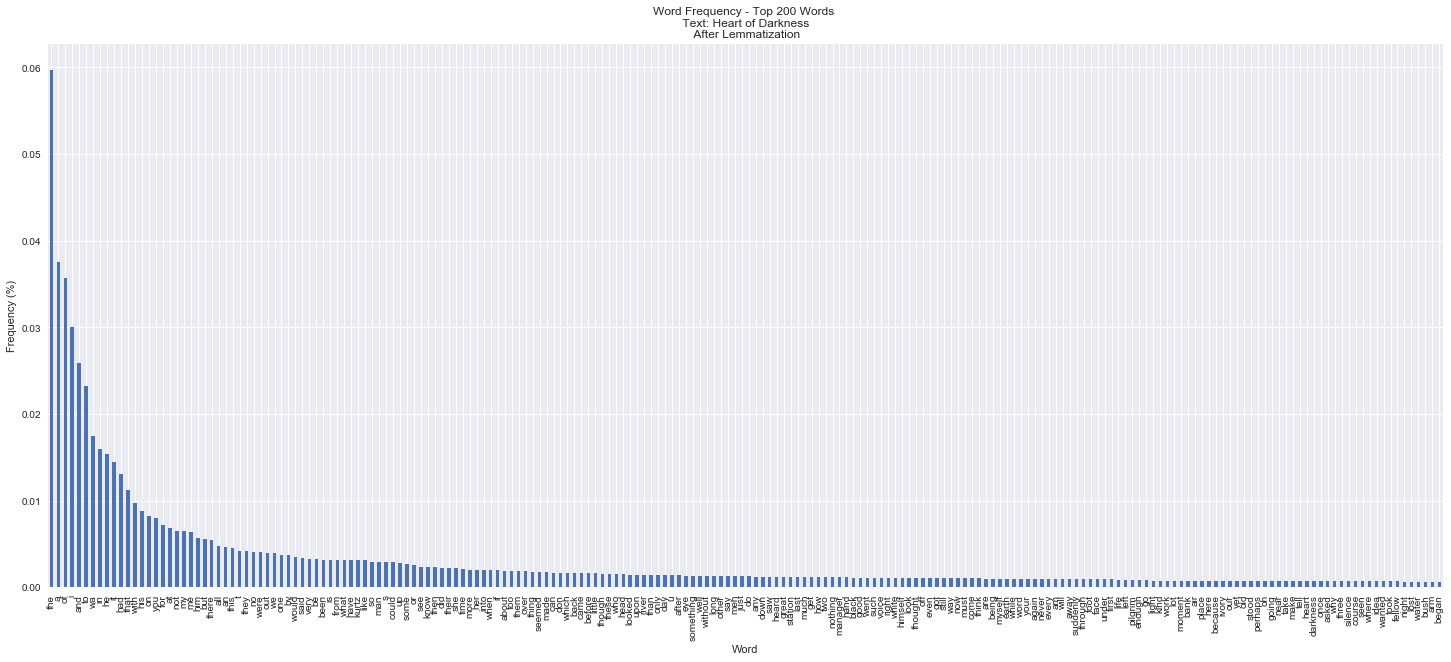

In [428]:
# size plot
plt.figure(figsize=(25,10))
# add title
plt.title("Word Frequency - Top 200 Words \n Text: Heart of Darkness \n After Lemmatization")
# plot
fdTopWordsLemmatized['frequencyPercent'].plot('bar')
plt.ylabel("Frequency (%)")
plt.xlabel("Word")

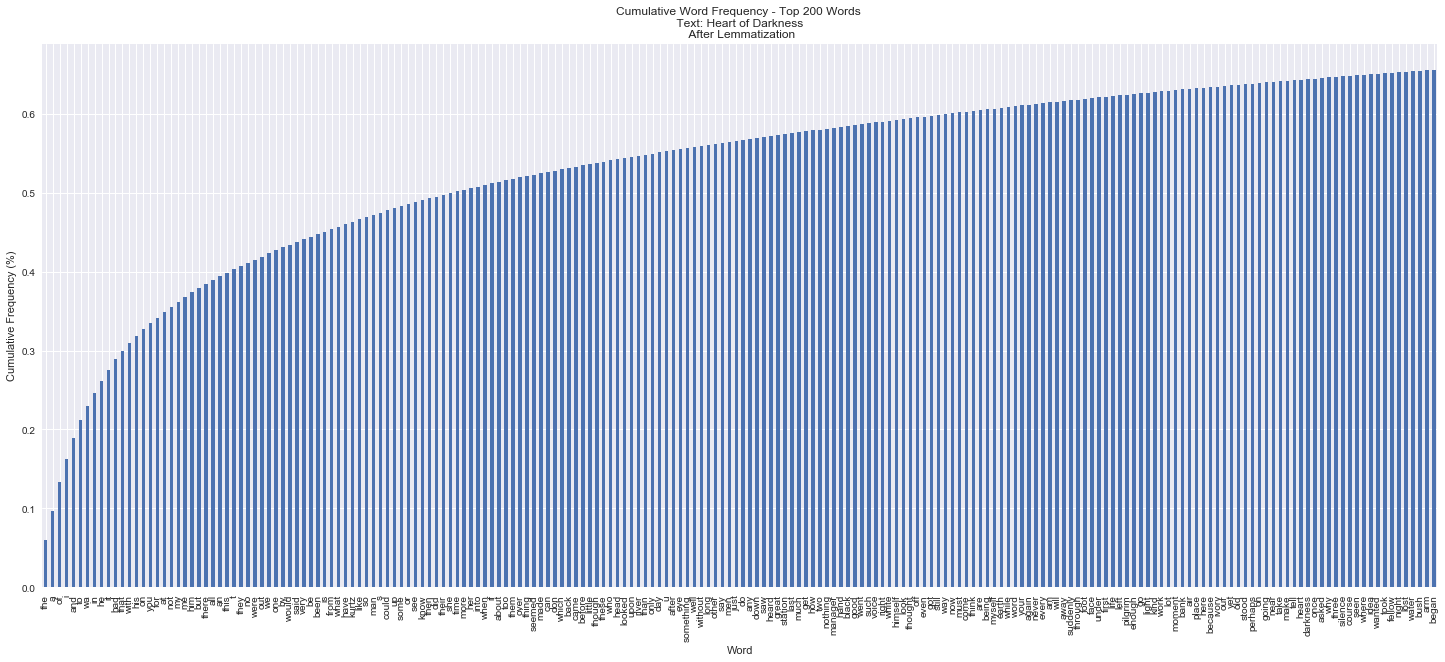

In [429]:
# size plot
plt.figure(figsize=(25,10))
# add title
plt.title("Cumulative Word Frequency - Top 200 Words \n Text: Heart of Darkness \n After Lemmatization")
# plot
fdTopWordsLemmatized['cumulativeFrequencyPercent'].plot('bar')
plt.ylabel("Cumulative Frequency (%)")
plt.xlabel("Word")

In [430]:
# set word rank (x)
wordRankLemmatized = numpy.log(range(1, len(fdTopWordsLemmatized)+1))
# set word count (y)
wordCountLemmatized = numpy.log(fdTopWordsLemmatized['frequencyCount'])
# estimate best fit line
slopeLemmatized, interceptLemmatized, r_valueLemmatized, p_valueLemmatized, std_errLemmatized = stats.linregress(wordRankLemmatized,wordCountLemmatized)
# create fitted work count based on estimates of s and alpha
fittedWordCountLemmatized = slopeLemmatized * x + interceptLemmatized
print 'Estimate of s is:\n{0}'.format(slopeLemmatized,3)

Estimate of s is:
-0.964259929202


In [431]:
print 'Estimate of alpha is:\n{0}'.format(interceptLemmatized,3)

Estimate of alpha is:
8.34915274849


In [432]:
print 'R^2 of our fitted line is:\n{0}'.format(r_valueLemmatized**2,3)

R^2 of our fitted line is:
0.994052431583


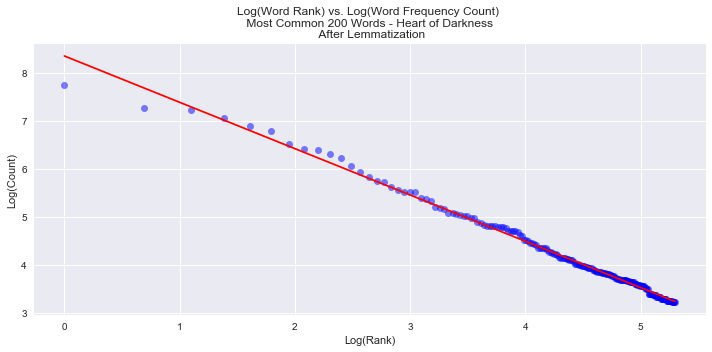

In [433]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
# plot
ax.plot(wordRankLemmatized, wordCountLemmatized, 'bo', alpha = 0.5)
# plot fitted line
ax.plot(x,fittedWordCountLemmatized,'r')
# add title
ax.set_title('Log(Word Rank) vs. Log(Word Frequency Count) \n Most Common 200 Words - Heart of Darkness \n After Lemmatization')
# add x-axis label
ax.set_xlabel('Log(Rank)')
# add y-axis label
ax.set_ylabel('Log(Count)')
# set 'tight' layout
plt.tight_layout()

Stemming and lemmatization had a negligible impact on the results presented in the main section of the assignment. The r-squared associated with the estimates of Zipf's Law did improve marginally with the application of both stemming and lemmatization. Both effects were too small to be statistically significant.

The main body of the assignment also allows for removing stopwords (removing the words that occur commonly across all the documents in the corpus, typically, articles and pronouns). Although this is a common approach in NLP preprocessing, Zipf's Law should be estimated without the removal of stopwords.